### EDA - Data analysis

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
_DS_base = os.path.join(os.getcwd(),'..','dataset')

_path_sales_train_csv = os.path.join(_DS_base,'sales_train.csv')
_path_shops_csv = os.path.join(_DS_base,'shops.csv')
_path_test_csv = os.path.join(_DS_base,'test.csv')
_path_item_categories_csv = os.path.join(_DS_base,'item_categories.csv')
_path_items_csv = os.path.join(_DS_base,'items.csv')
_path_sample_submission_csv = os.path.join(_DS_base,'sample_submission.csv')


In [4]:
sales_train_csv = pd.read_csv(_path_sales_train_csv)
shops_csv = pd.read_csv(_path_shops_csv)
test_csv = pd.read_csv(_path_test_csv)
item_categories_csv = pd.read_csv(_path_item_categories_csv)
items_csv = pd.read_csv(_path_items_csv)
sample_submission_csv = pd.read_csv(_path_sample_submission_csv)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
test_csv.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [36]:
item_categories_csv.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [148]:
items_csv.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [40]:
shops_csv.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [209]:
dataset = pd.merge(sales_train_csv,items_csv,how='left',on='item_id')
dataset = pd.merge(dataset,item_categories_csv,how='left',on='item_category_id')
dataset = pd.merge(dataset,shops_csv,how='left',on='shop_id')
dataset.head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
5,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум"""
6,02.01.2013,0,25,2565,549.00,1.0,DEEP PURPLE Stormbringer (фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
7,04.01.2013,0,25,2572,239.00,1.0,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
8,11.01.2013,0,25,2572,299.00,1.0,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
9,03.01.2013,0,25,2573,299.00,3.0,DEL REY LANA Born To Die,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""


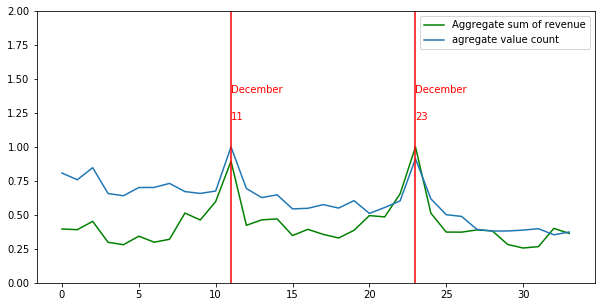

In [207]:
def get_month_of(w):
    return(dataset.loc[dataset['date_block_num']==w].date.iloc[0].month_name())

val = dataset[['date_block_num','revenue']].groupby('date_block_num').aggregate(sum)
val2 = dataset['date_block_num'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(val/val.max(),color='g')
plt.plot(val2/val2.max())
plt.legend(['Aggregate sum of revenue','agregate value count'])
plt.gca().set_ylim([0,2])
for w in val.sort_values(by='revenue',ascending=False).index[:2]:
    plt.axvline(w,color='r')
    plt.text(w,1.2,str(w),color='r')
    plt.text(w,1.4,get_month_of(w),color='r')

#### summary of abve value

* December usually have higher sales
* so we can concude that it is seasonal

Int64Index([31, 25, 54, 28, 57, 42, 27, 6, 58, 56], dtype='int64')

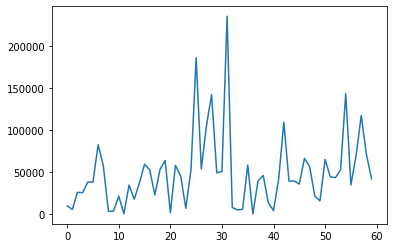

In [8]:
plt.plot(dataset['shop_id'].value_counts().sort_index())
#top 10 shops : 
dataset['shop_id'].value_counts().sort_values(ascending=False).index[:10]

In [16]:
dataset['revenue'] = dataset['item_price']*dataset['item_cnt_day']
dataset.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,revenue
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",999.00
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",899.00
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",1099.00


In [17]:
dataset_no_name = dataset.drop(columns=['item_name','item_category_name','shop_name'])

In [18]:
dataset_no_name.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,revenue
0,02.01.2013,0,59,22154,999.00,1.0,37,999.00
1,03.01.2013,0,25,2552,899.00,1.0,58,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,58,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,58,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,56,1099.00


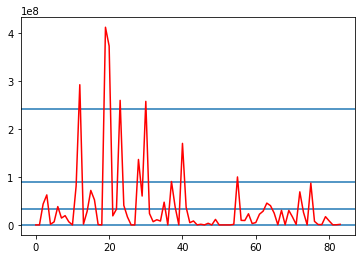

In [222]:
#revenue per item_category
val = dataset_no_name.groupby('item_category_id')['revenue'].aggregate(sum)
plt.axhline(y=0)
for i in range(18,21):plt.axhline(y=np.exp(i)/2)
plt.plot(val,color = 'r')

#### Here we can divide the data as log functions thus able to categorize them
* CAT 1 : exp(0) to exp(18)
* CAT 2 : exp(18) to exp(19)
* CAT 3 : exp(19) to exp(20)
* CAT 4 : > exp(20)

In [42]:
dataset['date'] = pd.to_datetime(dataset['date'],format='%d.%m.%Y')

### Exploring seasonal data

In [109]:
dow_1 = dataset.loc[dataset['date'].dt.dayofweek==5]['date'].sort_values().unique()[:30]

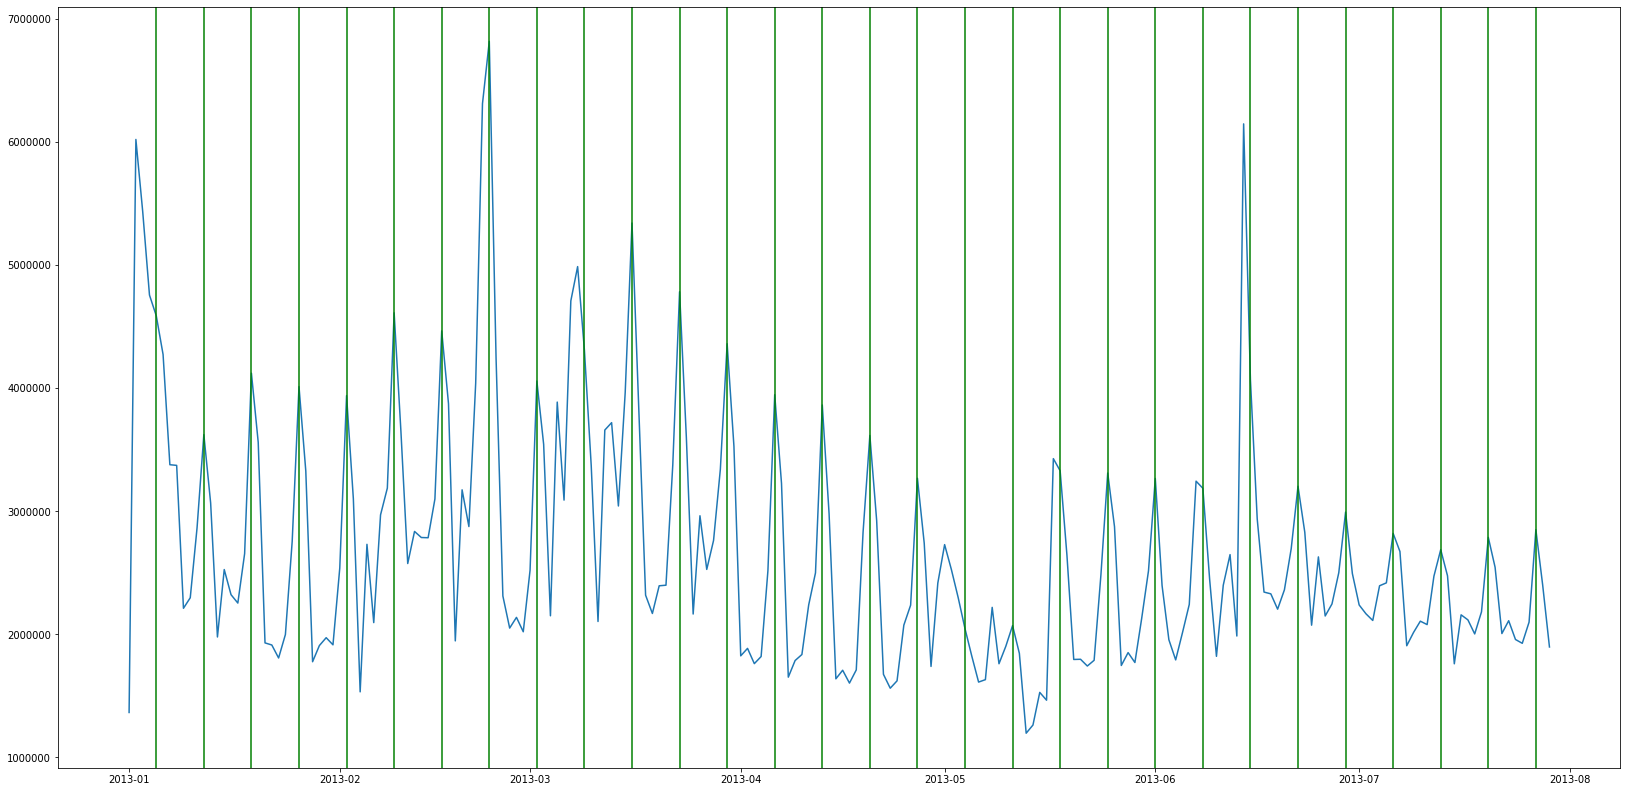

In [112]:
plt.figure(figsize=(28,14))
sample = dataset_no_name[['date','revenue']]
sample = sample.groupby('date').aggregate({'revenue':'sum'}).sort_index().iloc[:210]
plt.plot(sample)
for w in dow_1:plt.axvline(x=w,color='g')

#### saturdays shows peak in reveneue for all shopes

In [115]:
dataset['DOW'] = dataset['date'].dt.dayofweek

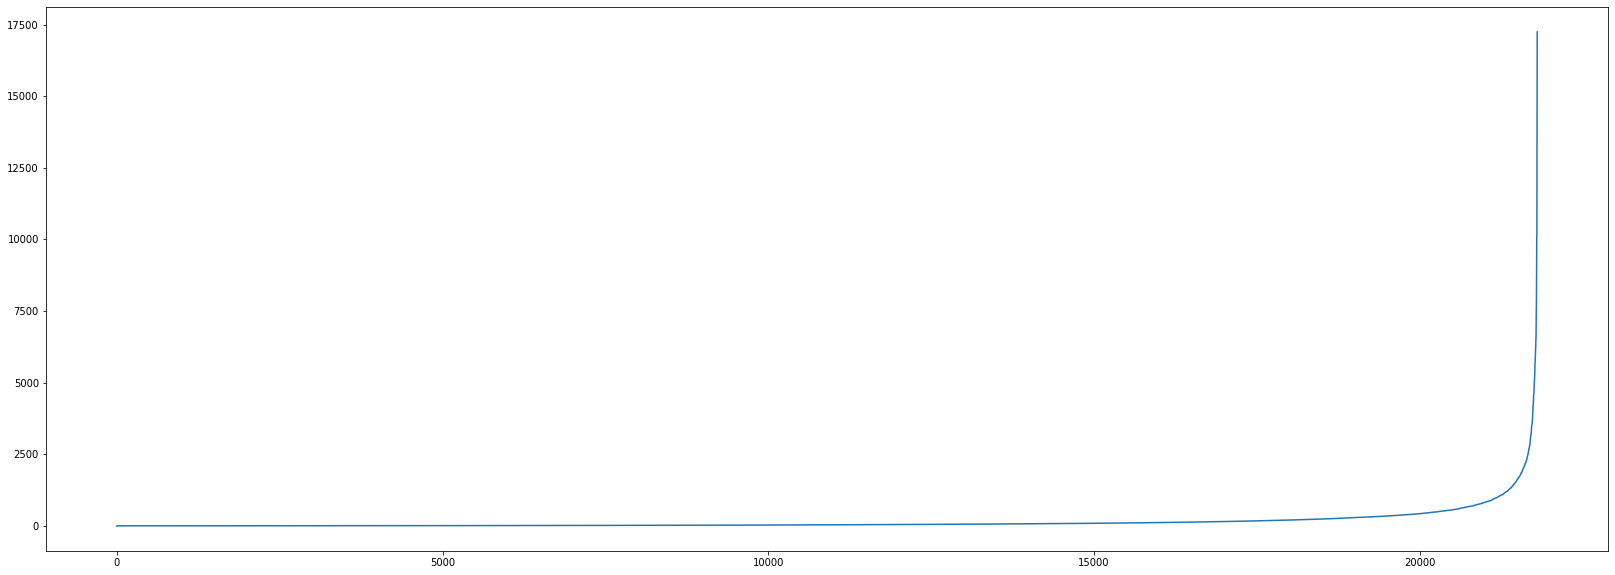

In [146]:
plt.figure(figsize=(28,10))
val = dataset[['item_id','item_cnt_day']].groupby('item_id').aggregate(sum)
val = val.drop(index=[20949],axis=1)
plt.plot(sorted(val.to_numpy()))

#### here we can make the following conclusions 

* only small portion of data have high values of item_cnt_day
* rest items are avergaed at 158